# 1. Importations des libraries

In [1]:
# 1.importations des libraries
import numpy as np
import pandas as pd

# 2. Chargement des donnees

In [3]:
# 2. chargement des donnees
data = pd.read_csv('DATA/studentscores.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des donnees

In [6]:
# 3. Analyse des donnees
data.isnull().sum() # verification des valeurs absentes dans le fichier

Hours     0
Scores    0
dtype: int64

In [7]:
#### data.info()

In [8]:
data['Hours'].max()

np.float64(9.2)

In [10]:
data['Hours'].min()

np.float64(1.1)

In [12]:
print(data['Hours'].max())

9.2


In [13]:
print("Max score :", data['Scores'].max())

Max score : 95


In [14]:
print("Max score :", data['Scores'].min())

Max score : 17


# 4. Division des donnees

# Variables indep et variable Dep

In [15]:
X = data.iloc[ : , : -1].values
Y = data.iloc[ : , -1].values

In [16]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# 4.1. Separation de donnees:Train et Test

In [18]:
# X_train, X_test, Y_train, Y_test
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=40)

In [26]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("Y_train Shape:", Y_train.shape)
print("Y_train Shape:", Y_test.shape)

X_train Shape: (18, 1)
X_test Shape: (7, 1)
Y_train Shape: (18,)
Y_train Shape: (7,)


In [29]:
# impoter l'algorithme de la regression lineaire
from sklearn.linear_model import LinearRegression

In [30]:
modele_lineaire = LinearRegression()

In [31]:
# entrainement du modele
modele_lineaire.fit(X_train,Y_train)

LinearRegression()

In [32]:
# faire de prediction
Y_scores_predicts = modele_lineaire.predict(X_test)

In [33]:
Y_test

array([95, 86, 17, 69, 42, 75, 54])

In [36]:
resultats = pd.DataFrame(Y_test, Y_scores_predicts)

In [38]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
print("MSE de la regression lineaire:",mean_squared_error(Y_test, Y_scores_predicts))

MSE de la regression lineaire: 51.90159659147337


In [41]:
print("R2 score de la regression lineaire :", r2_score(Y_test, Y_scores_predicts))

R2 score de la regression lineaire : 0.9168569951293908


# 6. Visualisation de Resultats

In [42]:
import matplotlib.pyplot as plt

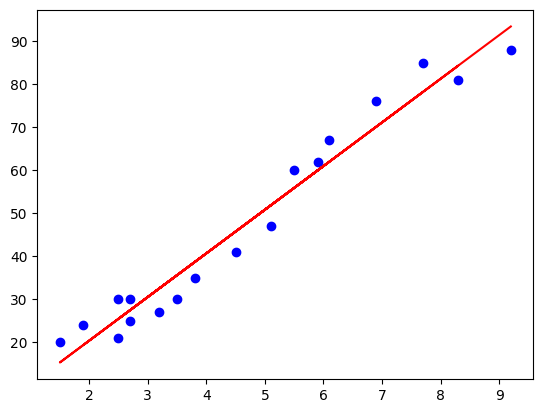

In [43]:
plt.scatter(X_train, Y_train, color='blue', label='train Data')
# plt.plot(X_test, Y_scores predicts,color='red', label='ligne de la regression')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='ligne de la regression')
plt.show()

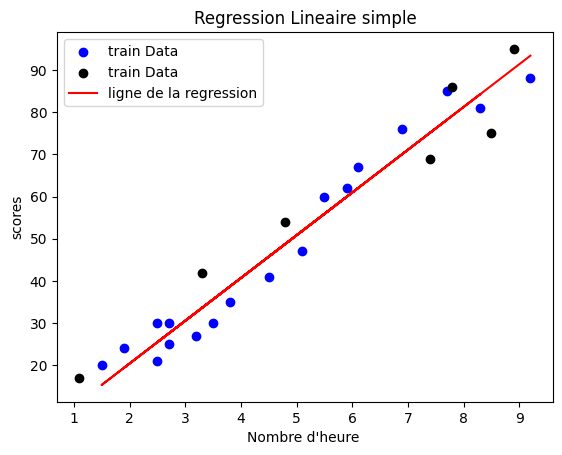

In [45]:
plt.scatter(X_train, Y_train, color='blue', label='train Data')
plt.scatter(X_test, Y_test, color='black', label='train Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color = 'red', label = 'ligne de la regression')
plt.xlabel("Nombre d'heure ")
plt.ylabel("scores")
plt.title("Regression Lineaire simple")
plt.legend()
plt.show()


# 7. Prediction Simple

In [46]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [47]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [51]:
resultats = pd.DataFrame({
    'y-score-reel': Y_test,
    'y-scores-predicts': Y_scores_predicts
})
resultats

,y-score-reel,y-scores-predicts
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [53]:
Y_scores_predicts

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [58]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


# 8. Soustraction

In [60]:
sub = Y_test - Y_scores_predicts
sub

array([  4.65137943,   6.79874172,   5.696312  ,  -6.147672  ,
         8.40158743, -11.29503428,   5.20063886])

In [65]:
resultats = pd.DataFrame({
    'Y-score-reel': Y_test,
    'Y-scores-predics':Y_scores_predicts,
    'reste':sub
})
resultats

,Y-score-reel,Y-scores-predics,reste
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639


In [68]:
# y = b0 + b1*x1
# score = b0 + b1 * hours
b1 = modele_lineaire.coef_
print("b1 = ", modele_lineaire.coef_)

b1 =  [10.13396571]


In [69]:
b0 = modele_lineaire.intercept_
print("b0 = ", modele_lineaire.intercept_)

b0 =  0.1563257200808863


In [71]:
print(modele_lineaire.predict([[3]]))

[30.55822286]
